In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Store filepath in a variable
data = "C:\\Users\\shane\\Downloads\\Resources\\data.csv"
data_by_artist = "C:\\Users\\shane\\Downloads\\Resources\\data_by_artist.csv"
data_by_genres = "C:\\Users\\shane\\Downloads\\Resources\\data_by_genres.csv"
data_by_year = "C:\\Users\\shane\\Downloads\\Resources\\data_by_year.csv"
data_w_genres = "C:\\Users\\shane\\Downloads\\Resources\\data_w_genres.csv"

In [3]:
data_df = pd.read_csv(data)
data_by_artist_df = pd.read_csv(data_by_artist)
data_by_genres_df = pd.read_csv(data_by_genres)
data_by_year_df = pd.read_csv(data_by_year)
data_w_genres_df = pd.read_csv(data_w_genres)

In [4]:
#view data
data_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.72100,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,1/8/2021,0.0601,143.874,0.132,2021
1,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,7/24/2020,0.0369,90.989,0.756,2020
2,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,10/30/2020,0.0878,144.015,0.682,2020
3,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,10/30/2020,0.0544,109.928,0.145,2020
4,0.21200,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,10/23/2020,0.1520,163.908,0.838,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.79500,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,1/22/2021,0.0360,94.710,0.228,2021
174385,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,12/25/2020,0.0356,125.972,0.186,2020
174386,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,1/22/2021,0.0360,94.710,0.228,2021
174387,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,12/9/2020,0.0282,108.058,0.714,2020


In [5]:
# view data by artist
data_by_artist_df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.0000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.9630,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.1429,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,김효근,0.939000,0.174000,341821.0000,0.321000,0.756000,0.695000,-13.411000,0.042200,138.300000,0.055400,0.000000,3,1,1
32535,나율,0.717000,0.591500,241281.5000,0.473500,0.000000,0.105000,-6.588500,0.053700,107.599000,0.507500,16.000000,1,1,4
32536,미스티,0.416000,0.686000,216715.0000,0.822000,0.000000,0.110000,-6.300000,0.080200,122.047000,0.625000,0.000000,5,0,2
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288000,0.739000,242480.0000,0.475000,0.000000,0.075700,-8.920000,0.379000,81.490000,0.800000,8.000000,2,0,2


In [6]:
# view data by genre
data_by_genres_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,zim urban groove,0.003910,0.553000,4.267200e+04,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1
3228,zolo,0.208648,0.533837,2.641016e+05,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1
3229,zouk,0.272928,0.641889,4.416418e+05,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1
3230,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,0


In [7]:
# view data by years
data_by_year_df

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.9971,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.7628,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.1405,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.3622,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.7076,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.207413,0.580475,243402.2495,0.686392,0.247068,0.231513,-8.026319,0.096717,121.829807,0.436313,31.662338,1,1
98,2018,0.233836,0.602731,227073.1400,0.659552,0.229874,0.231009,-8.173434,0.121045,123.644288,0.426566,27.599484,7,1
99,2019,0.261344,0.603101,225463.3263,0.629781,0.221123,0.218501,-8.527674,0.106820,122.419702,0.457813,32.346930,7,1
100,2020,0.202303,0.605285,218977.4828,0.674247,0.249008,0.234415,-8.077563,0.100629,124.058308,0.468030,24.064742,0,1


In [8]:
#view data with genres
data_w_genres_df

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.0000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.9630,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.1429,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,김효근,0.939000,0.174000,341821.0000,0.321000,0.756000,0.695000,-13.411000,0.042200,138.300000,0.055400,0.000000,3,1,1,[]
32535,나율,0.717000,0.591500,241281.5000,0.473500,0.000000,0.105000,-6.588500,0.053700,107.599000,0.507500,16.000000,1,1,4,[]
32536,미스티,0.416000,0.686000,216715.0000,0.822000,0.000000,0.110000,-6.300000,0.080200,122.047000,0.625000,0.000000,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288000,0.739000,242480.0000,0.475000,0.000000,0.075700,-8.920000,0.379000,81.490000,0.800000,8.000000,2,0,2,[]


In [9]:
#Convert duration in ms to minutes
duration_ms = data_df["duration_ms"]
duration_in_minutes = duration_ms/(1000*60)

#Add column showing duration in minutes
data_df["Duration in Minutes"] = data_df["duration_ms"]/(1000*60)
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Duration in Minutes
0,0.721,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,1/8/2021,0.0601,143.874,0.132,2021,4.033567
1,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,7/24/2020,0.0369,90.989,0.756,2020,2.342100
2,0.468,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,10/30/2020,0.0878,144.015,0.682,2020,2.872083
3,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,10/30/2020,0.0544,109.928,0.145,2020,3.418167
4,0.212,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,10/23/2020,0.1520,163.908,0.838,2020,2.982450


In [10]:
# Displaying Data from main data from for year, danceability, popularity, duration(minutes), and explicitness
dance_data = data_df.loc[:, ["year", "danceability", "popularity", "Duration in Minutes", "explicit", "tempo", "liveness"]]
dance_data.head()

,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
0,2021,0.585,100,4.033567,1,143.874,0.1050
1,2020,0.700,96,2.342100,1,90.989,0.2720
2,2020,0.737,96,2.872083,1,144.015,0.0931
3,2020,0.731,95,3.418167,1,109.928,0.1130
4,2020,0.863,95,2.982450,1,163.908,0.1030


In [11]:
# Retrieve the average danceability rating for every year
avg_by_year = dance_data.groupby(["year"]).mean()
avg_by_year.head()

,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
year,,,,,,
1920,0.515750,0.610315,3.968217,0.123209,113.226900,0.216049
1921,0.432171,0.391026,4.298196,0.070513,102.425397,0.205219
1922,0.575620,0.090909,2.335586,0.000000,100.033149,0.256662
1923,0.577341,5.205405,2.965706,0.000000,114.010730,0.227462
1924,0.549894,0.661017,3.184112,0.000000,120.689572,0.235219


In [14]:
#Find year with highest danceability
most_danceable = avg_by_year.sort_values(["danceability"], ascending=False).reset_index()
most_danceable.head()

,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness
0,1927,0.655929,0.684000,2.942380,0.016000,112.663707,0.177387
1,2021,0.652488,7.750543,3.712667,0.107065,120.525875,0.162309
2,1929,0.647840,0.314406,2.813260,0.452156,110.926711,0.235977
3,1936,0.623378,2.663500,2.882977,0.000000,108.393047,0.213556
4,2020,0.605285,24.064741,3.649625,0.175361,124.058308,0.234415


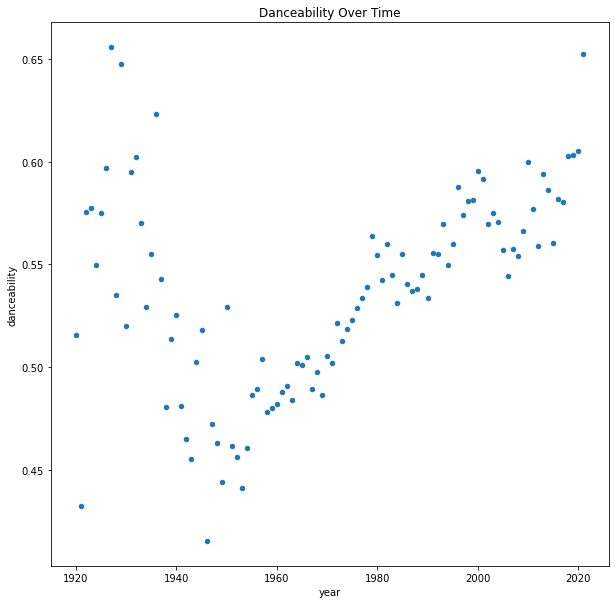

In [16]:
#Showing how danceable music has become over time
most_danceable.plot(kind="scatter", x="year", y="danceability", figsize=(10,10), title="Danceability Over The Years")
plt.show()

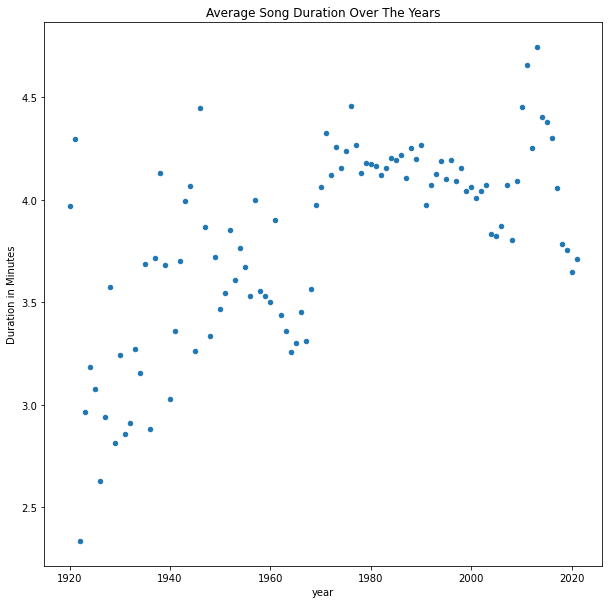

In [18]:
#Showing how the average length of songs have changed over time
most_danceable.plot(kind="scatter", x="year", y="Duration in Minutes", figsize=(10,10), title="Average Song Duration Over The Years")
plt.show()

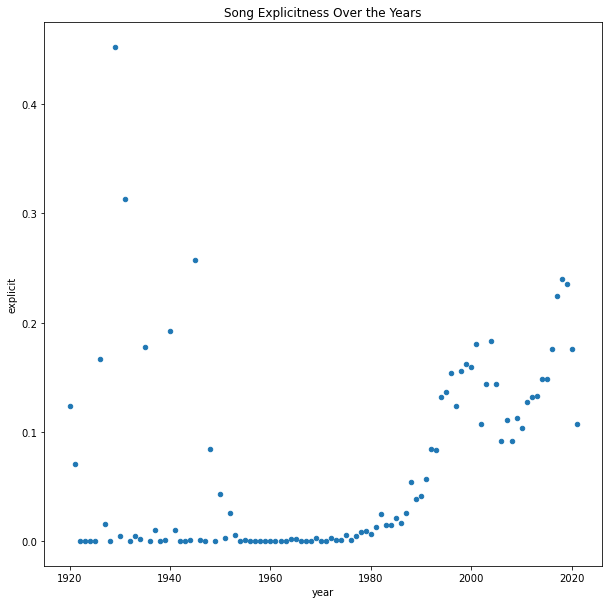

In [19]:
#Showing how explicit music has become over time
most_danceable.plot(kind="scatter", x="year", y="explicit", figsize=(10,10), title="Song Explicitness Over the Years")
plt.show()

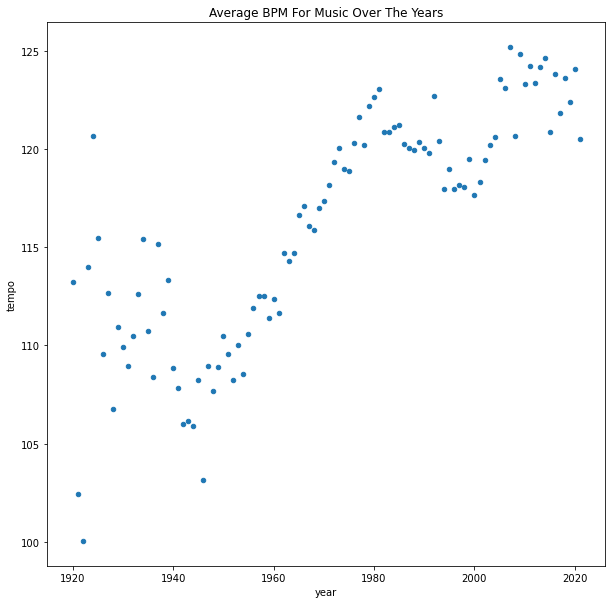

In [20]:
most_danceable.plot(kind="scatter", x="year", y="tempo", figsize=(10,10), title="Average BPM For Music Over The Years")
plt.show()